In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os



print(tf.__version__)

2.12.0


# **Read Image Data**

In [4]:
Parasitized_cell=os.listdir('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/')
uninfected_cell=os.listdir('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/')
print("parasitized cell:",len(Parasitized_cell))
print("Uninfcted cell:",len(uninfected_cell))

parasitized cell: 13780
Uninfcted cell: 13780


## Visualization Cell Images


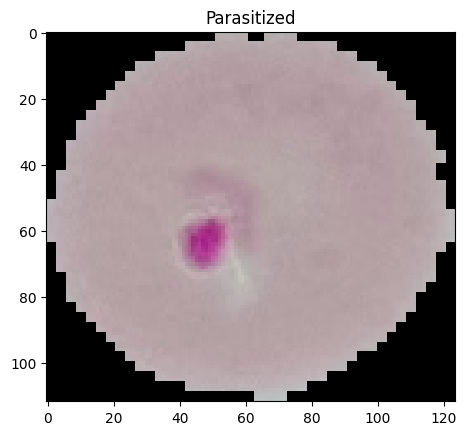

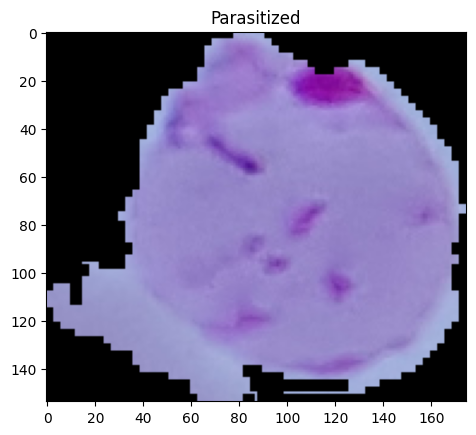

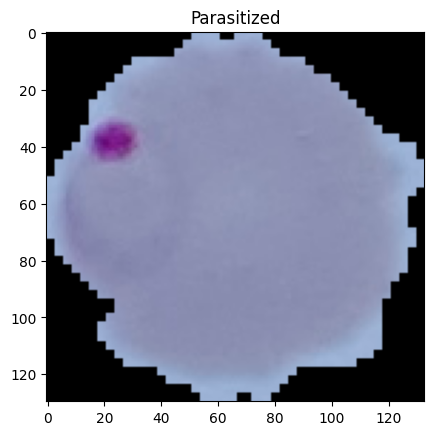

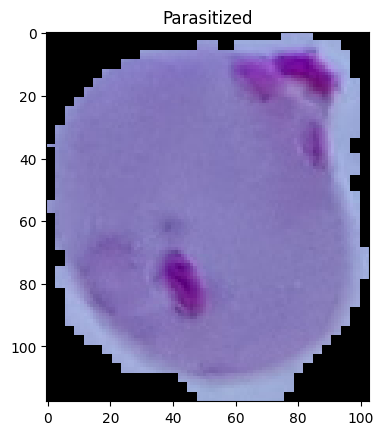

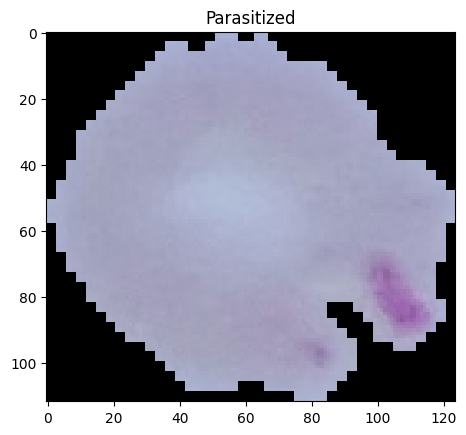

In [5]:
for i in range(5):
    img=cv2.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/'+Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

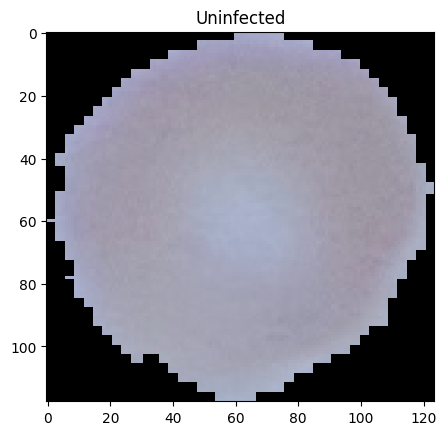

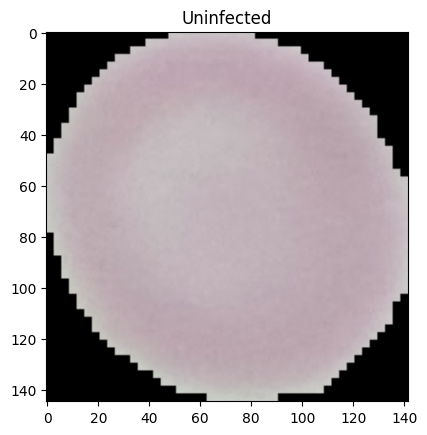

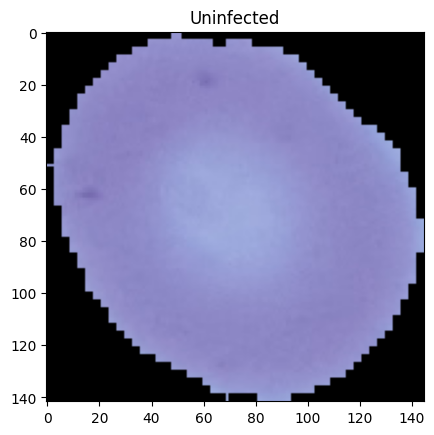

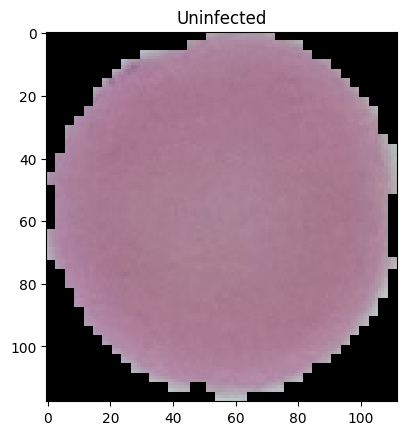

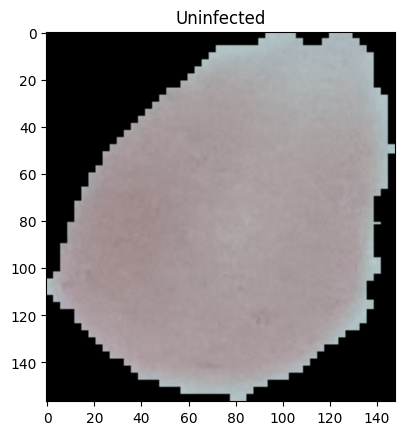

In [6]:
for i in range(5):
    img=cv2.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/'+uninfected_cell[i])
    plt.imshow(img)
    plt.title("Uninfected")
    plt.show()

## Resizing the cell images

In [9]:
width = 68
height = 68


## Split the dataset

In [10]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)


In [11]:

train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (width, height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )


Found 22048 images belonging to 2 classes.


automatically assign labels

In [12]:
train_data_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [13]:

validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (width,height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )
#testing data is generated

Found 5510 images belonging to 2 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**CNN model building**

In [14]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (width, height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [18]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 6,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/6


<ipython-input-18-e4a9eb572894>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


1378/1378 [==============================] - 162s 117ms/step - loss: 0.6613 - accuracy: 0.5996 - val_loss: 0.6032 - val_accuracy: 0.6933
Epoch 2/6
1378/1378 [==============================] - 152s 111ms/step - loss: 0.4223 - accuracy: 0.8169 - val_loss: 0.2325 - val_accuracy: 0.9252
Epoch 3/6
1378/1378 [==============================] - 145s 105ms/step - loss: 0.2294 - accuracy: 0.9308 - val_loss: 0.2112 - val_accuracy: 0.9338
Epoch 4/6
1378/1378 [==============================] - 148s 107ms/step - loss: 0.1988 - accuracy: 0.9397 - val_loss: 0.1845 - val_accuracy: 0.9301
Epoch 5/6
1378/1378 [==============================] - 152s 110ms/step - loss: 0.1796 - accuracy: 0.9451 - val_loss: 0.1785 - val_accuracy: 0.9394
Epoch 6/6
1378/1378 [==============================] - 153s 111ms/step - loss: 0.1591 - accuracy: 0.9517 - val_loss: 0.1728 - val_accuracy: 0.9419


# Plotting Accuracy

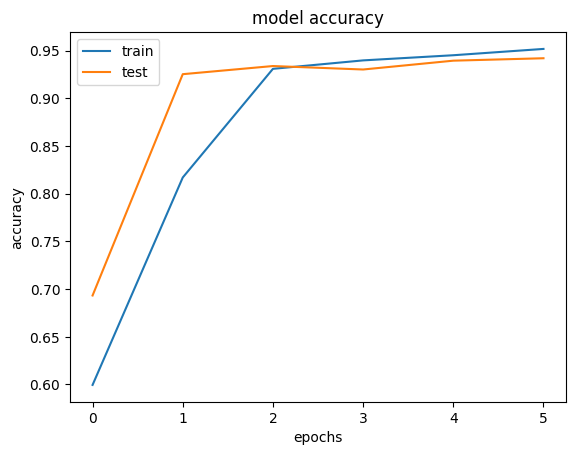

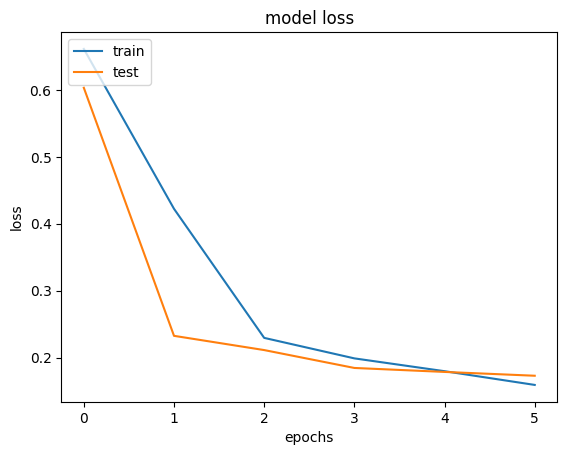

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---

# Testing

1/1 [==============================] - 0s 192ms/step


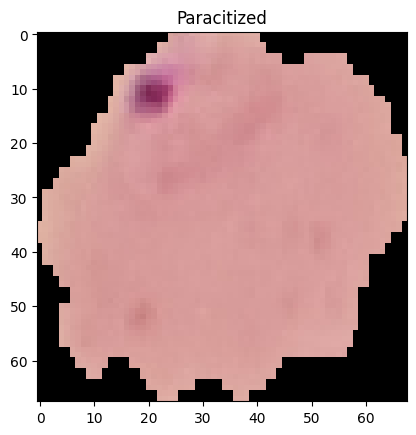

In [22]:
testimg_path="/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C101P62ThinF_IMG_20150918_151149_cell_87.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")
